 ***Instructions***
* An Excel sheet is provided to download the data given against it.
Work with the data.
* while submitting submit the .ipynb file directly. ***no need to convert to pdf***
* Select the Data set, Processing specific row ranges according to your Roll number's last Digit


0) data(1000, 8000) data1
1) data(1500, 9633) data1
2) data(1, 8650) data1
3) data(1, 9633) data1
4) data(1, 8888) data2 
5) data(1, 9633) data2
6) data(1384, 8499) data2
7) data(2000, 9633) data2
8) data(1, 3000) data3
9) data(3001, 6002) data3
* Rename the file to your roll number.ipynb (eg:111101001.ipynb)


SECTION 1:
Import all required.
*Make sure that all the import statements are written in the below python cell.* 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

SECTION 2:
import the dataset given to you and name it with your name .
Example : your name : john
Name of dataframe : john_df

In [2]:
df=pd.read_excel('data2.xlsx')
anuj_df = df.iloc[2000:9633].copy()

In [39]:
anuj_df = anuj_df.drop(columns=['Unnamed: 18', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], errors='ignore')
anuj_df = anuj_df.drop(columns=['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 19'], errors='ignore')


In [40]:
anuj_df.head()

,Hookload,STP,SPM,WOB,RPM,Torque,ROP,TotDepth,BitDepth,Block_Pos,TD_Dleg,TD_Dleg_cumu,TD_MW,TD_Fun_Vis,Total_Load,FLOW_OUT_REL,Qmud,dDepth
2000,-0.375280,-1.904751,0.66786,-1.315621,-0.867260,-1.944962,-1.272430,-1.699081,1.364242e-12,1.881856,0.523160,-1.50078,-4.200607,-0.9875,-1.414980,0.0,0.66786,-0.099935
2001,-0.347084,-1.905028,0.66786,-1.338873,-0.867789,-1.958503,-1.259766,-1.698873,1.364242e-12,1.879888,0.524625,-1.50078,-4.198704,-0.9875,-1.402255,0.0,0.66786,-0.100677
2002,-0.319720,-1.904960,0.66786,-1.361015,-0.868481,-1.971253,-1.243213,-1.698666,1.364242e-12,1.877941,0.526090,-1.50078,-4.196802,-0.9875,-1.389579,0.0,0.66786,-0.101419
2003,-0.293429,-1.904999,0.66786,-1.381787,-0.869310,-1.982824,-1.215547,-1.698459,1.364242e-12,1.876041,0.527554,-1.50078,-4.194899,-0.9875,-1.377015,0.0,0.66786,-0.102161
2004,-0.267923,-1.905035,0.66786,-1.401369,-0.870122,-1.993259,-1.189817,-1.698251,1.364242e-12,1.874140,0.529019,-1.50078,-4.192996,-0.9875,-1.364390,0.0,0.66786,-0.102904


SECTION 3: 

Step 1: Normalize the data 
Step 2: Find Correlation matrix

In [21]:
cleaned_df = anuj_df.dropna()
anuj_df.dropna(inplace=True)

In [28]:
from sklearn.preprocessing import StandardScaler
numeric_columns = anuj_df.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
anuj_df[numeric_columns] = scaler.fit_transform(anuj_df[numeric_columns])

print("Data after Z-Score Normalization:")
print(anuj_df.describe())

Data after Z-Score Normalization:
           Hookload           STP           SPM           WOB           RPM  \
count  7.632000e+03  7.632000e+03  7.632000e+03  7.632000e+03  7.632000e+03   
mean   3.098383e-15 -4.885912e-15 -4.587991e-15  1.787529e-16  4.051732e-15   
std    1.000066e+00  1.000066e+00  1.000066e+00  1.000066e+00  1.000066e+00   
min   -1.914000e+00 -1.905232e+00 -1.807926e+00 -2.274962e+00 -1.076146e+00   
25%   -6.309516e-01 -7.557495e-01 -5.650132e-01 -7.028264e-01 -8.881991e-01   
50%   -1.754414e-01 -1.364434e-01  2.193217e-01  6.656172e-02 -6.835941e-01   
75%    6.194508e-01  6.905556e-01  6.678597e-01  4.996669e-01  8.935370e-01   
max    2.220276e+00  2.280301e+00  1.489775e+00  2.077575e+00  1.796789e+00   

             Torque           ROP      TotDepth      BitDepth     Block_Pos  \
count  7.632000e+03  7.632000e+03  7.632000e+03  7.632000e+03  7.632000e+03   
mean   4.885912e-15 -2.830254e-16  3.634642e-15  1.364242e-12 -1.489607e-16   
std    1.000066e+

In [30]:
correlation_matrix =anuj_df.corr()
print(correlation_matrix)

              Hookload       STP       SPM       WOB       RPM    Torque  \
Hookload      1.000000  0.202218 -0.675558 -0.460823  0.607192  0.120659   
STP           0.202218  1.000000  0.074506  0.308688  0.349427  0.450962   
SPM          -0.675558  0.074506  1.000000  0.185763 -0.612118 -0.293472   
WOB          -0.460823  0.308688  0.185763  1.000000 -0.033612  0.796437   
RPM           0.607192  0.349427 -0.612118 -0.033612  1.000000  0.516138   
Torque        0.120659  0.450962 -0.293472  0.796437  0.516138  1.000000   
ROP          -0.008573  0.148682  0.226207 -0.148125 -0.044435 -0.149798   
TotDepth      0.664169  0.470546 -0.830334  0.009778  0.715704  0.489686   
BitDepth           NaN       NaN       NaN       NaN       NaN       NaN   
Block_Pos    -0.009798 -0.137948  0.212827 -0.077011 -0.111497 -0.112143   
TD_Dleg      -0.388992 -0.293690  0.659578 -0.063900 -0.681613 -0.427417   
TD_Dleg_cumu  0.689575  0.525103 -0.789220  0.008703  0.779514  0.511581   
TD_MW       

<Axes: >

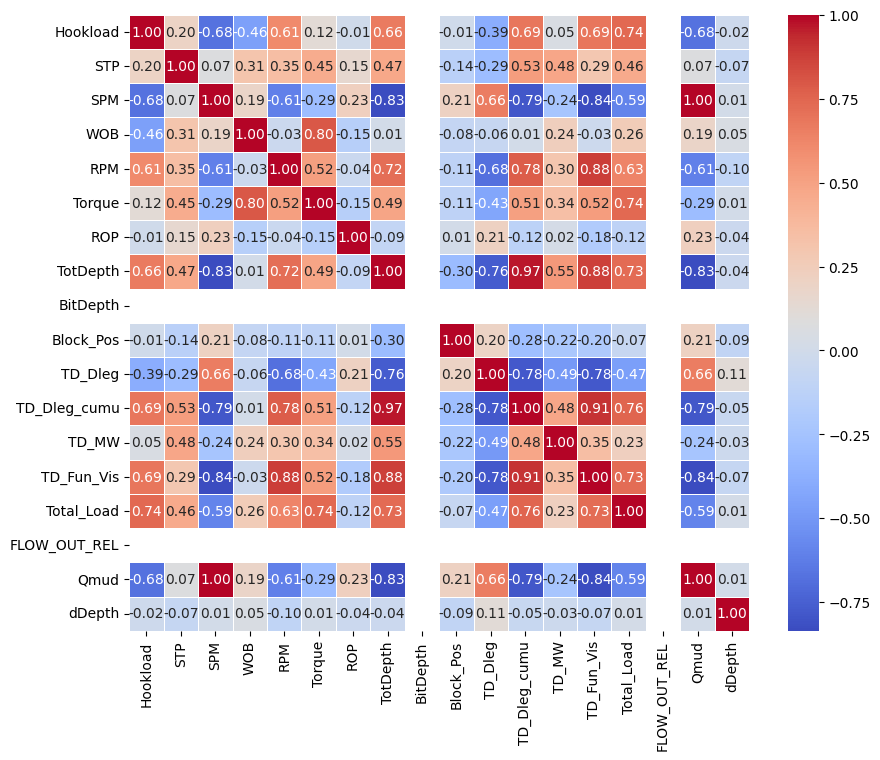

In [31]:
corr_matrix = anuj_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

SECTION 4:

* Step 1: Perform Feature Selection using Lasso Regression(L1 approach)
* Step 2: Perform Feature Selection using Ridge Regression(L2 approach)
* Step 3: Perform the combined approach - Elastic Net (L1 + L2)
* Step 4: Explain the differences between the above 3 approaches

* Features: Other than  Hookload, STP, ROP
* Labels: Hookload, STP, ROP

In [34]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

anuj_df = anuj_df.drop(columns=[col for col in anuj_df.columns if 'Unnamed' in col], errors='ignore')
anuj_df.fillna(anuj_df.mean(numeric_only=True), inplace=True)
numeric_columns = anuj_df.select_dtypes(include=[np.number]).columns
X = anuj_df[numeric_columns].drop(columns=['ROP'], errors='ignore')
y = anuj_df['ROP']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
feature_importance = pd.Series(lasso.coef_, index=X.columns)
selected_features = feature_importance[feature_importance != 0].index.tolist()
print("\nSelected Features Using Lasso Regression:")
print(selected_features)



Selected Features Using Lasso Regression:
['SPM', 'WOB', 'Torque', 'TotDepth', 'Block_Pos', 'TD_Dleg', 'TD_Dleg_cumu', 'TD_MW', 'TD_Fun_Vis', 'Total_Load', 'Qmud', 'dDepth']


In [41]:
from sklearn.linear_model import Ridge

anuj_df.fillna(anuj_df.mean(numeric_only=True), inplace=True)

numeric_columns = anuj_df.select_dtypes(include=[np.number]).columns

X = anuj_df[numeric_columns].drop(columns=['ROP'], errors='ignore')
y = anuj_df['ROP']

X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

feature_importance = pd.Series(ridge.coef_, index=X.columns)

sorted_features = feature_importance.abs().sort_values(ascending=False)


threshold = 0.05 
selected_features = sorted_features[sorted_features > threshold].index.tolist()

print("\nSelected Features Using Ridge Regression:")
print(selected_features)

print("\nFeature Importance Scores:")
print(sorted_features)


Selected Features Using Ridge Regression:
['Torque', 'WOB', 'Total_Load', 'TotDepth', 'RPM', 'SPM', 'Qmud', 'TD_Fun_Vis', 'Hookload', 'STP', 'TD_MW', 'TD_Dleg']

Feature Importance Scores:
Torque          5.980692
WOB             4.155925
Total_Load      2.666451
TotDepth        2.294412
RPM             1.431610
SPM             0.898331
Qmud            0.898331
TD_Fun_Vis      0.732497
Hookload        0.591557
STP             0.454877
TD_MW           0.286799
TD_Dleg         0.217581
TD_Dleg_cumu    0.022577
dDepth          0.003011
Block_Pos       0.002172
BitDepth        0.000000
FLOW_OUT_REL    0.000000
dtype: float64


In [43]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

anuj_df = anuj_df.drop(columns=[col for col in anuj_df.columns if 'Unnamed' in col], errors='ignore')

anuj_df.fillna(anuj_df.mean(numeric_only=True), inplace=True)

numeric_columns = anuj_df.select_dtypes(include=[np.number]).columns

X = anuj_df[numeric_columns].drop(columns=['ROP'], errors='ignore')
y = anuj_df['ROP']

X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

feature_importance = pd.Series(elastic_net.coef_, index=X.columns)

selected_features = feature_importance[feature_importance != 0].index.tolist()

print("\nSelected Features Using Elastic Net:")
print(selected_features)

print("\nFeature Importance Scores:")
print(feature_importance.sort_values(ascending=False))



Selected Features Using Elastic Net:
['STP', 'SPM', 'WOB', 'RPM', 'Torque', 'TotDepth', 'Block_Pos', 'TD_Dleg', 'TD_Dleg_cumu', 'TD_MW', 'TD_Fun_Vis', 'Total_Load', 'Qmud', 'dDepth']

Feature Importance Scores:
Torque          1.112001
TotDepth        0.997775
Qmud            0.253402
SPM             0.250572
TD_Dleg         0.216457
RPM             0.081074
STP             0.038160
Hookload       -0.000000
BitDepth        0.000000
FLOW_OUT_REL    0.000000
dDepth         -0.023283
TD_MW          -0.025174
Block_Pos      -0.039004
Total_Load     -0.366868
TD_Dleg_cumu   -0.428637
TD_Fun_Vis     -0.502349
WOB            -1.035708
dtype: float64


### *🔹 Differences Between Lasso, Ridge, and Elastic Net Regression for Feature Selection*  

| *Method* | *Regularization Type* | *Effect on Coefficients* | *Feature Selection?* | *Best Used When…* |
|------------|-----------------|----------------------|-----------------|------------------|
| *Lasso (L1 Regularization)* | *L1 penalty* (sum of absolute coefficients) | Shrinks some coefficients to *zero* | ✅ *Yes* (removes unimportant features) | You need *automatic feature selection* and a *sparse model*. |
| *Ridge (L2 Regularization)* | *L2 penalty* (sum of squared coefficients) | Shrinks coefficients but *keeps all features* | ❌ *No* (all features retained) | Features are *highly correlated*, and you want to reduce overfitting. |
| *Elastic Net (L1 + L2 Regularization)* | *Combination of L1 and L2* | Some coefficients shrink to *zero, others shrink but remain | ✅ **Yes* (but more flexible than Lasso) | You need both *feature selection* and *handling of correlated features*. |

---



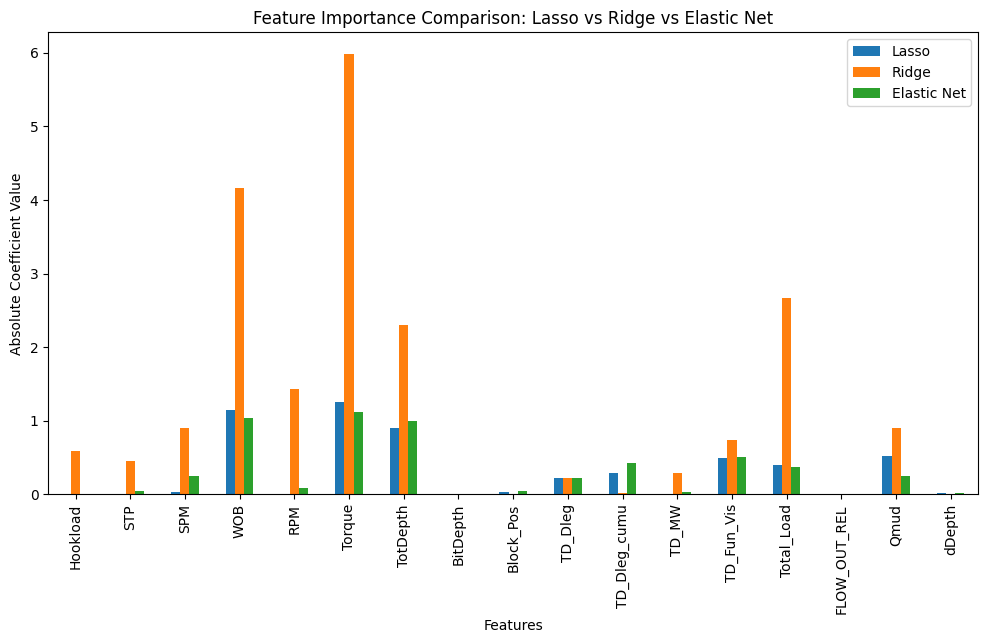

In [44]:
import matplotlib.pyplot as plt
import numpy as np

lasso_coeffs = np.abs(lasso.coef_)
ridge_coeffs = np.abs(ridge.coef_)
elastic_coeffs = np.abs(elastic_net.coef_)

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_coeffs,
    'Ridge': ridge_coeffs,
    'Elastic Net': elastic_coeffs
})

feature_importance_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))

plt.title("Feature Importance Comparison: Lasso vs Ridge vs Elastic Net")
plt.xlabel("Features")
plt.ylabel("Absolute Coefficient Value")
plt.legend()
plt.xticks(rotation=90)
plt.show()